# 4.10 Coding Etiquette & Excel Reporting Part 1

The Script contains the following information:

### 1. Preparation
### 2. Tasks

## 1. Preparation

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# defining path
path = r'C:\Users\chris\OneDrive\Desktop\Data Analytics CF\202203_Instacart Basket Analysis'

In [3]:
# Importing Dataframe
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_w_visuals_49.pkl'))

In [4]:
# Data Checks
instacart.shape

(32404859, 30)

In [5]:
instacart.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order_x  first_order  product_id  add_to_cart_order  \
0                       NaN         True         196                  1   
1                       NaN         True       14084                  2   
2                       NaN         True       12427                  3   
3                       NaN         True       26088                  4   
4                       NaN         True       26405                  5   

   reordered  ... average_price  spending_flag  median_days_since_prior_order  \
0          0  ...      6.367797    Low spender                           20.0   
1          0  ...      6.367797    Low spender                           20.0   
2          0  ...      6.367797    Low spender                           20.0   
3          0  ...      6.367797    Low spender                           20.0   
4          0  ...      6.367797    Low spender                           20.0   

     Frequency_flag  gender    state age n_dependants  fam_status income  
0  Regular customer  Female  Alabama  31            3     married  40423  
1  Regular customer  Female  Alabama  31            3     married  40423  
2  Regular customer  Female  Alabama  31            3     married  40423  
3  Regular customer  Female  Alabama  31            3     married  40423  
4  Regular customer  Female  Alabama  31            3     married  40423  

[5 rows x 30 columns]

In [6]:
instacart.tail()

order_id  user_id  order_number  orders_day_of_week  \
32404854   2977660   206209            13                   1   
32404855   2977660   206209            13                   1   
32404856   2977660   206209            13                   1   
32404857   2977660   206209            13                   1   
32404858   2977660   206209            13                   1   

          order_hour_of_day  days_since_prior_order_x  first_order  \
32404854                 12                       7.0        False   
32404855                 12                       7.0        False   
32404856                 12                       7.0        False   
32404857                 12                       7.0        False   
32404858                 12                       7.0        False   

          product_id  add_to_cart_order  reordered  ... average_price  \
32404854       14197                  5          1  ...      7.058915   
32404855       38730                  6          0  ...      7.058915   
32404856       31477                  7          0  ...      7.058915   
32404857        6567                  8          0  ...      7.058915   
32404858       22920                  9          0  ...      7.058915   

          spending_flag  median_days_since_prior_order    Frequency_flag  \
32404854    Low spender                           20.0  Regular customer   
32404855    Low spender                           20.0  Regular customer   
32404856    Low spender                           20.0  Regular customer   
32404857    Low spender                           20.0  Regular customer   
32404858    Low spender                           20.0  Regular customer   

          gender state age n_dependants  fam_status  income  
32404854  Female  Iowa  74            3     married  137969  
32404855  Female  Iowa  74            3     married  137969  
32404856  Female  Iowa  74            3     married  137969  
32404857  Female  Iowa  74            3     married  137969  
32404858  Female  Iowa  74            3     married  137969  

[5 rows x 30 columns]

In [7]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   order_id                       int32  
 1   user_id                        int32  
 2   order_number                   int8   
 3   orders_day_of_week             int8   
 4   order_hour_of_day              int8   
 5   days_since_prior_order_x       float16
 6   first_order                    bool   
 7   product_id                     int32  
 8   add_to_cart_order              int32  
 9   reordered                      int8   
 10  product_name                   object 
 11  aisle_id                       int8   
 12  department_id                  int8   
 13  prices                         float32
 14  price_range_loc                object 
 15  busiest_day                    object 
 16  busiest_days                   object 
 17  busiest_period_of_day          object 
 18  

## 2 Tasks

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The only PII information I see in the data set were first and last name. However, as they didn't add anything to the analysis I aready deleted these columns in the prior Exercise, although my main goal was to reduce the size of the dataframe and save memory. 
Although the other information can be sensitive as well it doesn't allow a direct conclusion on who this person might be. 

3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

        Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
    
        Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)


In [8]:
# Defining Regions according to Census Bureau-designated areas
Northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [9]:
# Creating a Region column for the Regions defined above
instacart.loc[instacart['state'].isin(Northeast), 'Region'] = 'Northeast'

In [10]:
instacart.loc[instacart['state'].isin(Midwest), 'Region'] = 'Midwest'

In [11]:
instacart.loc[instacart['state'].isin(South), 'Region'] = 'South'

In [12]:
instacart.loc[instacart['state'].isin(West), 'Region'] = 'West'

In [13]:
instacart.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order_x  first_order  product_id  add_to_cart_order  \
0                       NaN         True         196                  1   
1                       NaN         True       14084                  2   
2                       NaN         True       12427                  3   
3                       NaN         True       26088                  4   
4                       NaN         True       26405                  5   

   reordered  ... spending_flag  median_days_since_prior_order  \
0          0  ...   Low spender                           20.0   
1          0  ...   Low spender                           20.0   
2          0  ...   Low spender                           20.0   
3          0  ...   Low spender                           20.0   
4          0  ...   Low spender                           20.0   

     Frequency_flag  gender    state age n_dependants fam_status  income  \
0  Regular customer  Female  Alabama  31            3    married   40423   
1  Regular customer  Female  Alabama  31            3    married   40423   
2  Regular customer  Female  Alabama  31            3    married   40423   
3  Regular customer  Female  Alabama  31            3    married   40423   
4  Regular customer  Female  Alabama  31            3    married   40423   

  Region  
0  South  
1  South  
2  South  
3  South  
4  South  

[5 rows x 31 columns]

In [14]:
# Checking for NaN values occuring due to typos etc
instacart['Region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [15]:
# Creating new dataframe for customer ID with Region and spending flag
region_spending = instacart[['user_id', 'Region', 'spending_flag']]

In [16]:
# Checking consistency 
region_spending.shape

(32404859, 3)

In [17]:
# Dropping duplicate customer IDs to have unique user dataframe
region_spending = region_spending.drop_duplicates(subset = 'user_id')

In [18]:
# Dropping user_id column
del region_spending['user_id']

In [19]:
region_spending.groupby('Region').agg({'spending_flag' : ['value_counts']})

spending_flag
                         value_counts
Region    spending_flag              
Midwest   Low spender           47256
          High spender           1263
Northeast Low spender           35505
          High spender            883
South     Low spender           66920
          High spender           1817
West      Low spender           51171
          High spender           1394

In [20]:
regional_spending_bar = region_spending.groupby('Region').agg({'spending_flag' : ['value_counts']})

In [21]:
regional_spending = pd.crosstab(region_spending['Region'], region_spending['spending_flag'], dropna = False)

In [22]:
# Copying to clipboard to analyze the proportion of high and low spenders per region in Excel
regional_spending.to_clipboard()

The results shows that West, South and Midwest have a percentage of 2,6%-2,65% of high spenders, while the Northeast is lagging a bit behind with 2,43%.

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [23]:
# Creating exclusion flag for customers with <5 orders
instacart.loc[instacart['max_order'] <5, 'exclusion_flag'] = True

In [24]:
instacart.head()

order_id  user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329        1             1                   2                  8   
1   2539329        1             1                   2                  8   
2   2539329        1             1                   2                  8   
3   2539329        1             1                   2                  8   
4   2539329        1             1                   2                  8   

   days_since_prior_order_x  first_order  product_id  add_to_cart_order  \
0                       NaN         True         196                  1   
1                       NaN         True       14084                  2   
2                       NaN         True       12427                  3   
3                       NaN         True       26088                  4   
4                       NaN         True       26405                  5   

   reordered  ... median_days_since_prior_order    Frequency_flag  gender  \
0          0  ...                          20.0  Regular customer  Female   
1          0  ...                          20.0  Regular customer  Female   
2          0  ...                          20.0  Regular customer  Female   
3          0  ...                          20.0  Regular customer  Female   
4          0  ...                          20.0  Regular customer  Female   

     state age n_dependants fam_status income  Region exclusion_flag  
0  Alabama  31            3    married  40423   South            NaN  
1  Alabama  31            3    married  40423   South            NaN  
2  Alabama  31            3    married  40423   South            NaN  
3  Alabama  31            3    married  40423   South            NaN  
4  Alabama  31            3    married  40423   South            NaN  

[5 rows x 32 columns]

In [25]:
# Defining new dataframe for customers with 5+ orders by negating the boolean True value
high_spenders = instacart[instacart['exclusion_flag'] != True]

In [26]:
# Comparing dataframe rows with value count from original dataframe
high_spenders.shape

(30964564, 32)

In [27]:
instacart['exclusion_flag'].value_counts(dropna = False)

NaN     30964564
True     1440295
Name: exclusion_flag, dtype: int64

In [28]:
#Exporting new dataframe to pickle
high_spenders.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [29]:
# Identifying number of unique customers by familiy status
instacart.groupby('fam_status')['user_id'].nunique()

fam_status
divorced/widowed                     17640
living with parents and siblings      9701
married                             144906
single                               33962
Name: user_id, dtype: int64

In [30]:
customers_by_family_status = instacart.groupby('fam_status')['user_id'].nunique()

In [31]:
instacart.loc[instacart['fam_status'] == 'single']

order_id  user_id  order_number  orders_day_of_week  \
979        1483446       12             1                   1   
980        1483446       12             1                   1   
981        1483446       12             1                   1   
982        1247527       12             2                   5   
983        1247527       12             2                   5   
...            ...      ...           ...                 ...   
32401623    452589   206193            41                   0   
32401624    452589   206193            41                   0   
32401625    452589   206193            41                   0   
32401626    452589   206193            41                   0   
32401627    452589   206193            41                   0   

          order_hour_of_day  days_since_prior_order_x  first_order  \
979                      12                       NaN         True   
980                      12                       NaN         True   
981                      12                       NaN         True   
982                       9                      30.0        False   
983                       9                      30.0        False   
...                     ...                       ...          ...   
32401623                 15                       3.0        False   
32401624                 15                       3.0        False   
32401625                 15                       3.0        False   
32401626                 15                       3.0        False   
32401627                 15                       3.0        False   

          product_id  add_to_cart_order  reordered  ...  \
979            17159                  1          0  ...   
980            21616                  2          0  ...   
981            40377                  3          0  ...   
982            13176                  1          0  ...   
983            10863                  2          0  ...   
...              ...                ...        ...  ...   
32401623       35921                 17          1  ...   
32401624       13988                 18          0  ...   
32401625       26629                 19          0  ...   
32401626       21914                 20          0  ...   
32401627       23579                 21          1  ...   

         median_days_since_prior_order         Frequency_flag  gender  \
979                               28.0  Non-frequent customer    Male   
980                               28.0  Non-frequent customer    Male   
981                               28.0  Non-frequent customer    Male   
982                               28.0  Non-frequent customer    Male   
983                               28.0  Non-frequent customer    Male   
...                                ...                    ...     ...   
32401623                           5.0      Frequent customer  Female   
32401624                           5.0      Frequent customer  Female   
32401625                           5.0      Frequent customer  Female   
32401626                           5.0      Frequent customer  Female   
32401627                           5.0      Frequent customer  Female   

            state age n_dependants fam_status  income  Region exclusion_flag  
979        Hawaii  46            0     single  167293    West            NaN  
980        Hawaii  46            0     single  167293    West            NaN  
981        Hawaii  46            0     single  167293    West            NaN  
982        Hawaii  46            0     single  167293    West            NaN  
983        Hawaii  46            0     single  167293    West            NaN  
...           ...  ..          ...        ...     ...     ...            ...  
32401623  Wyoming  41            0     single   70597    West            NaN  
32401624  Wyoming  41            0     single   70597    West            NaN  
32401625  Wyoming  41            0     single   70597    West            NaN  
32401626  Wy

In [32]:
unique_customer_df = instacart.drop_duplicates(subset = 'user_id')

In [33]:
unique_customer_df.shape

(206209, 32)

In [34]:
unique_order_df = instacart.drop_duplicates(subset = 'order_id')

In [35]:
unique_order_df.shape

(3214685, 32)

In [36]:
pd.set_option('display.max_columns', None)

In [37]:
unique_order_df.pivot_table(values = 'order_id', index = 'orders_day_of_week', columns = 'order_hour_of_day', aggfunc = 'count')

order_hour_of_day     0     1     2    3    4     5     6      7      8   \
orders_day_of_week                                                         
0                   3692  2235  1299  888  749  1076  3138  11530  26219   
1                   3474  1734  1063  711  761  1523  5101  15790  32560   
2                   2906  1485   892  679  700  1330  4524  12549  23485   
3                   2767  1407   889  605  666  1265  4314  11738  21304   
4                   2476  1414   837  640  694  1250  4135  11821  20597   
5                   2989  1539   953  796  857  1466  4572  12587  22622   
6                   3067  1781  1137  801  747  1060  3007  10631  21520   

order_hour_of_day      9      10     11     12     13     14     15     16  \
orders_day_of_week                                                           
0                   37990  44995  47355  47727  49994  50484  50018  45928   
1                   49529  52997  49008  44545  44235  44219  43910  42198   
2                   34495  37258  36183  33751  34646  35097  35405  35481   
3                   30651  34014  33273  31577  32191  32862  33905  33282   
4                   29644  33053  31846  30336  30775  31664  32095  32171   
5                   32250  36202  35690  33497  34114  35129  35215  33699   
6                   28914  33352  34634  34755  35205  36089  35569  33177   

order_hour_of_day      17     18     19     20     21     22    23  
orders_day_of_week                                                  
0                   36873  27346  20970  16982  13424  10440  6393  
1                   34610  27292  20925  15422  11292   8458  5322  
2                   30213  24886  18922  14222  10070   7671  5079  
3                   28619  23533  18103  13063   9717   7731  4895  
4                   27577  22871  18192  13351  10169   8274  5308  
5                   28085  22700  17511  12556   8956   7005  4953  
6                   28097  22364  16988  12506   9805   7959  5663

In [38]:
unique_order_df.pivot_table(values = 'order_id', index = 'orders_day_of_week', columns = 'fam_status', aggfunc = 'count')

fam_status          divorced/widowed  living with parents and siblings  \
orders_day_of_week                                                       
0                              47207                             26342   
1                              47371                             26571   
2                              37545                             20931   
3                              35359                             19332   
4                              34033                             19146   
5                              36877                             20330   
6                              36075                             19973   

fam_status          married  single  
orders_day_of_week                   
0                    391971   92225  
1                    389786   92951  
2                    310563   72890  
3                    289793   67887  
4                    281645   66366  
5                    298363   70373  
6                    294709   68071

In [39]:
unique_order_df.pivot_table(values = 'order_id', index = 'order_hour_of_day', columns = 'fam_status', aggfunc = 'count').to_clipboard()

In [40]:
unique_order_df.groupby(['fam_status', 'Region']).agg({'income':['mean', 'min', 'max'],'average_price':['mean', 'min', 'max'], 'age': ['mean','min','max'], 'n_dependants': ['mean','min','max']})

income                 \
                                                     mean    min     max   
fam_status                       Region                                    
divorced/widowed                 Midwest    111983.400937  29477  540828   
                                 Northeast  113808.574930  29005  576876   
                                 South      112297.660131  29192  578251   
                                 West       112177.630322  29011  473722   
living with parents and siblings Midwest     68950.406417  26257  372571   
                                 Northeast   69633.849616  26095  319983   
                                 South       69931.408107  26158  396364   
                                 West        69217.244336  25937  357226   
married                          Midwest     99312.090135  25986  579397   
                                 Northeast   98346.384603  26072  573617   
                                 South       98195.048001  25911  591089   
                                 West        98604.596002  25941  593901   
single                           Midwest     89856.362866  25903  544248   
                                 Northeast   88422.508321  26265  584097   
                                 South       88687.748930  25979  569810   
                                 West        88470.759552  26028  550917   

                                           average_price            \
                                                    mean       min   
fam_status                       Region                              
divorced/widowed                 Midwest        9.840550  1.900000   
                                 Northeast     12.977854  1.200000   
                                 South         12.624353  1.308333   
                                 West          11.675389  2.255556   
living with parents and siblings Midwest        9.000071  2.133333   
                                 Northeast      9.491523  3.185714   
                                 South         12.232140  1.300000   
                                 West          11.729394  1.800000   
married                          Midwest       12.073051  1.000000   
                                 Northeast     11.531932  1.100000   
                                 South         11.809754  1.000000   
                                 West          11.300921  1.300000   
single                           Midwest       16.331461  1.800000   
                                 Northeast     10.892797  1.100000   
                                 South         12.900504  1.100000   
                                 West          10.215987  1.000000   

                                                                age          \
                                                     max       mean min max   
fam_status                       Region                                       
divorced/widowed                 Midwest      558.744446  70.750075  60  81   
                                 Northeast   3074.905029  70.595915  60  81   
                                 South      14042.512695  70.393816  60  81   
                                 West        2522.939697  70.586468  60  81   
living with parents and siblings Midwest      627.991638  19.531528  18  21   
                                 Northeast   1618.085449  19.506934  18  21   
                                 South       5668.766113  19.539902  18  21   
                                 West       10209.987305  19.446085  18  21   
married                          Midwest    12506.924805  51.562372  22  81   
                                 Northeast   7414.485352  51.464484  22  81   
                                 South      11772.099609  51.610004  22  81   
                                 West        8703.400391  51.575056  22  81   
single                           Midwest    25005.425781  38.936253  18  59   
           

**Analysis:**</br>
While there are some differences in the average price mean, min and max those will not be used for further customer segmentation/profiling. </br>
Within the regions there is no significant differantiation between mean income, age and dependants. Therefore, the data will be further analyzed for customer segmentation.

In [41]:
unique_order_df.groupby(['fam_status']).agg({'income':['mean', 'min', 'max'],'average_price':['mean', 'min', 'max'], 'age': ['mean','min','max'], 'n_dependants': ['mean','min','max']})

income                average_price  \
                                           mean    min     max          mean   
fam_status                                                                     
divorced/widowed                  112471.428219  29005  578251     11.810225   
living with parents and siblings   69469.386103  25937  396364     10.879327   
married                            98588.477233  25911  593901     11.692179   
single                             88863.799796  25903  584097     12.678232   

                                                           age          \
                                  min           max       mean min max   
fam_status                                                               
divorced/widowed                  1.2  14042.512695  70.561251  60  81   
living with parents and siblings  1.3  10209.987305  19.508665  18  21   
married                           1.0  12506.924805  51.564193  22  81   
single                            1.0  25005.425781  38.621027  18  59   

                                 n_dependants          
                                         mean min max  
fam_status                                             
divorced/widowed                     0.000000   0   0  
living with parents and siblings     1.996233   1   3  
married                              2.003082   1   3  
single                               0.000000   0   0

**Analysis:**</br>
The family status presents some remarkable differences that should be further analyzed to structure customer profiling.
The average_price per item bought varies, with singles having the highest average (12,68) and "living with parents and siblings" having only 10.88. </br>
The divorced/widowed customers have the highest average income with 112.471, followed by married (98.588), singles (88.863) andliving with parents and siblings (69.469). </br>
With regard to the age the divorced/widowed have the highest age range with 60-81. The married customers are spread quite evenly with the age ranging from 22 - 81. Singles have a limited range with 18-59, while the "livings with parents and siblings group" is only 18-21 years old. </br>
With regard to dependants the divorced/widowed and singles do not have any dependants while "living with parents and siblings" and married have 1 to 3 dependants</br>
</br>

In [42]:
unique_order_df.groupby(['Region']).agg({'income':['mean', 'min', 'max'],'average_price':['mean', 'min', 'max'], 'age': ['mean','min','max'], 'n_dependants': ['mean','min','max']})

income                average_price                     \
                   mean    min     max          mean  min           max   
Region                                                                    
Midwest    97338.098529  25903  579397     12.452729  1.0  25005.425781   
Northeast  96787.300011  26072  584097     11.462641  1.1   7414.485352   
South      96464.299737  25911  591089     12.079238  1.0  15006.940430   
West       96696.620991  25937  593901     11.173076  1.0  10209.987305   

                 age         n_dependants          
                mean min max         mean min max  
Region                                             
Midwest    49.522010  18  81     1.495246   0   3  
Northeast  49.569354  18  81     1.497339   0   3  
South      49.479194  18  81     1.503835   0   3  
West       49.565627  18  81     1.505170   0   3

**Analysis:** </br>
Overall the are no differences over the regions, except for the average_price, this is probably influenced by the max prices which are possible outliers but were not disregarded for the analysis. AS income, age and dependants do not show any significant deviations per regions, these will not be used to create a profiling variable.

In [43]:
instacart.pivot_table(values = 'order_id', index= 'fam_status', columns = 'department_id', aggfunc = 'count')

department_id                          1      2       3        4       5   \
fam_status                                                                  
divorced/widowed                   193575   3002  100401   812834   12615   
living with parents and siblings   108533   1911   56142   449628    8896   
married                           1569050  25205  821881  6654218  105682   
single                             363585   6173  194004  1562611   26503   

department_id                         6        7      8       9      10  \
fam_status                                                                
divorced/widowed                   23060   231025   8409   74220   2765   
living with parents and siblings   13074   124629   5620   41702   1674   
married                           188466  1889052  67513  609663  24621   
single                             44653   443417  16174  141042   5513   

department_id                         11      12       13      14      15  \
fam_status                                                                  
divorced/widowed                   38542   60477   159981   59498   89259   
living with parents and siblings   21312   33981    90272   34731   51190   
married                           314254  500862  1318340  493725  752030   
single                             73464  113607   306776  115079  175579   

department_id                          16      17      18       19      20  \
fam_status                                                                   
divorced/widowed                   461911   61805   35326   246796   90818   
living with parents and siblings   260787   35226   20146   137163   50415   
married                           3788598  522667  297162  2029589  735689   
single                             887451  118968   71168   474002  174327   

department_id                        21  
fam_status                               
divorced/widowed                   5493  
living with parents and siblings   3571  
married                           48486  
single                            11595

In [44]:
instacart.pivot_table(values = 'order_id', index= 'fam_status', columns = 'department_id', aggfunc = 'count').to_clipboard()

**Analysis:** </br>
The pivot table shows that there is no significant difference in the order count per family status with regard to the department id. The biggest difference of the order count per department id for the grouping of family status is 0,34% with the "living with parents and siblings group" putting 29% of order items to department 4 (produce) while the singles place 29,34% of order items there. 
Overall department 4 accounts for 29,55% of order items placed, followed by department 16 (16,66%, dairy eggs), department 19 (8,91%, snacks) and department 7 (8,30%, beverages). These 4 departments alone make up for 63,12% of all order items.


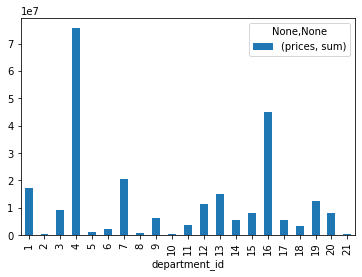

In [45]:
# Total spending per department (sum of prices per department)
spending_per_department = instacart.groupby(['department_id']).agg({'prices' : ['sum']}).plot.bar()

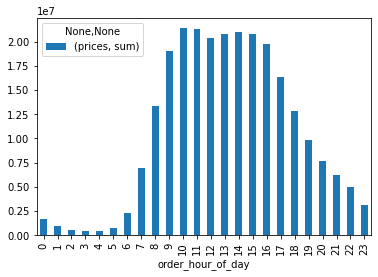

In [46]:
# Total spending per daytime
spending_per_hour = instacart.groupby(['order_hour_of_day']).agg({'prices' : ['sum']}).plot.bar()

In [47]:
#value count of items ordered by price range and hour of the day
instacart.pivot_table(values = 'order_id', index= 'order_hour_of_day', columns = 'price_range_loc', aggfunc = 'count')

price_range_loc    High-range product  Low-range product  Mid-range product
order_hour_of_day                                                          
0                                2779              68160             147830
1                                1416              35953              78331
2                                 925              21785              46665
3                                 647              15795              34839
4                                 696              16507              36039
5                                1067              27214              59680
6                                3740              89902             196851
7                               11595             275920             603539
8                               21947             536748            1159423
9                               29696             775279            1649228
10                              33801             873664            1854295
11                              35439             860467            1840234
12                              34573             819742            1764217
13                              35049             830490            1795415
14                              35436             837566            1816134
15                              35474             828700            1797970
16                              33566             789191            1712445
17                              27016             650258            1410380
18                              21266             509103            1106133
19                              15703             392448             850154
20                              12401             303498             660257
21                              10286             246963             538388
22                               8037             196106             430082
23                               5123             124862             272331

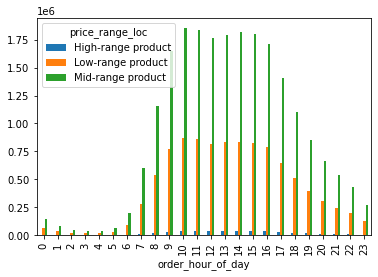

In [48]:
price_range_loc_bar = instacart.pivot_table(values = 'order_id', index= 'order_hour_of_day', columns = 'price_range_loc', aggfunc = 'count').plot.bar()

In [49]:
# Boxplot of income/  Histogram of income to group customers
instacart.boxplot(column ='income')

<AxesSubplot:>

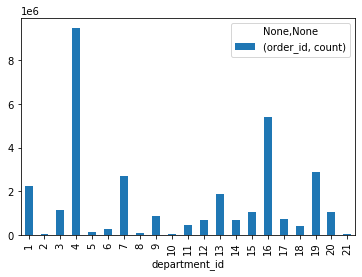

In [50]:
# orders per department
orders_per_department = instacart.groupby(['department_id']).agg({'order_id' : ['count']}).plot.bar()

6. Create an appropriate visualization to show the distribution of profiles.

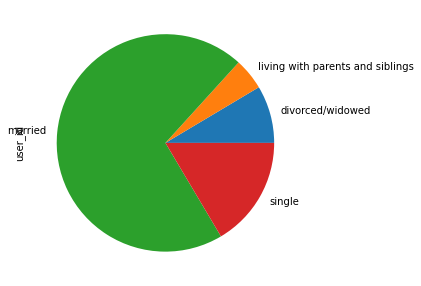

In [51]:
# Creating a pie chart for unique customers per familiy status
customers_by_family_status_pie = customers_by_family_status.plot.pie(figsize=(5, 5))

In [52]:
customers_by_family_status_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customers_by_fam_status.png'))

<AxesSubplot:xlabel='Region,spending_flag'>

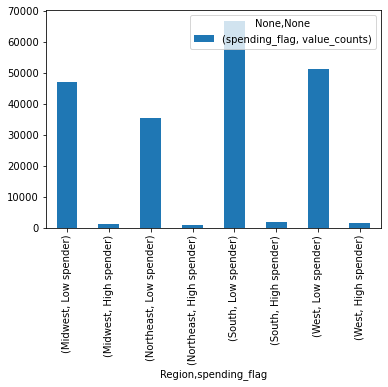

In [53]:
regional_spending_bar.plot.bar(stacked = True)

In [54]:
spending_per_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_per_department.png'))

In [55]:
spending_per_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_per_hour.png'))

In [56]:
price_range_loc_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_loc_bar.png'))

In [57]:
orders_per_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_per_department.png'))

10. Tidy up your script, export your final data set, and save your notebook.

In [58]:
# export dataframe to save progress and continue in new script
instacart.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_results.pkl'))